<a href="https://colab.research.google.com/github/MichaelWDanko/colab-google-files/blob/main/Halo_Infinite_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-11-5da667046e9d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranked_arena_data['Date'] = pd.to_datetime(ranked_arena_data['Date'])


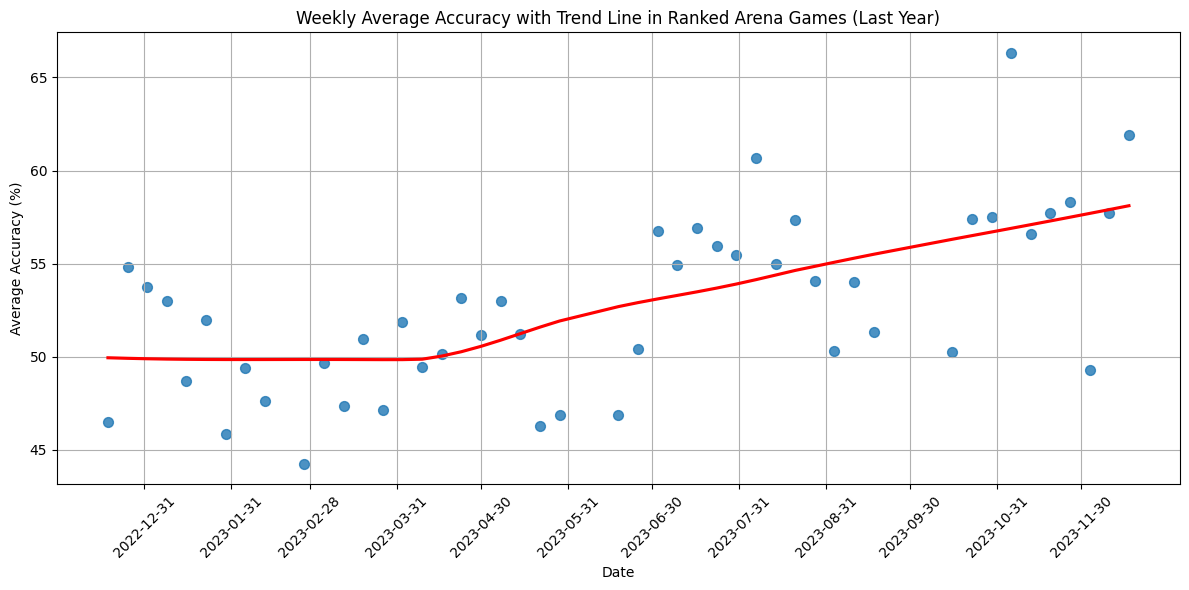

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Load the data
file_path = '../content/jaxasaurous-infinite-matchhistory-12-21-2023.csv'
data = pd.read_csv(file_path)

# Filter for 'Ranked Arena' playlist and convert 'Date' to datetime
ranked_arena_data = data[data['Playlist'] == 'Ranked Arena']
ranked_arena_data['Date'] = pd.to_datetime(ranked_arena_data['Date'])

# Filter the data for the last 365 days
end_date = ranked_arena_data['Date'].max()
start_date_year = end_date - timedelta(days=365)
data_last_year = ranked_arena_data[(ranked_arena_data['Date'] >= start_date_year) & (ranked_arena_data['Date'] <= end_date)]

# Group by week and calculate the average accuracy
weekly_accuracy_year = data_last_year.resample('W', on='Date')['Accuracy'].mean().reset_index()
weekly_accuracy_year['DateNumeric'] = weekly_accuracy_year['Date'].apply(lambda x: x.toordinal())

# Plotting the trend with a trend line
plt.figure(figsize=(12, 6))
sns.regplot(x='DateNumeric', y='Accuracy', data=weekly_accuracy_year, lowess=True, scatter_kws={'s':50}, line_kws={'color': 'red'})
plt.title('Weekly Average Accuracy with Trend Line in Ranked Arena Games (Last Year)')
plt.xlabel('Date')
plt.ylabel('Average Accuracy (%)')
plt.grid(True)

# Adjusting x-axis to show dates
date_ticks = pd.date_range(start=start_date_year, end=end_date, freq='M').to_pydatetime()
plt.xticks([d.toordinal() for d in date_ticks], [d.strftime('%Y-%m-%d') for d in date_ticks], rotation=45)
plt.tight_layout()
plt.show()

